**PREDICTING THE PATTERNS THAT WOULD DETERMINE CLIENT RETENTION USING SYRIATEL CUSTOMER CHURN DATASET.**

In [77]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import sklearn.model_selection as sk
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
#loading the dataset
df = pd.read_csv('Data.csv')

In [79]:
#check first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
#checking rows and columns
df.shape

(3333, 21)

In [36]:
#checking summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**There are no missing values in this dataset**

**numerical data in 16/21 columns**

account length - the duration of time the client has been active

area code - area code of client residence

number vmail messages - total vmail messages sent by client

total day minutes  - total day minutes used by client

total day calls  - total number of day calls made

total day charge  - total charge for the day calls
   
total eve minutes - total evening minutes used by client
  
total eve calls   - total number of evening calls made
   
total eve charge  - total charge for the evening calls
  
total night minutes - total night minutes used by client
   
total night calls  - total number of night calls made
  
total night charge  - total charge forthe night calls
  
total intl minutes   - total international minutes used by the client 
 
total intl calls   - total number of international calls made
   
total intl charge - total charge for the international calls     
   
customer service calls  - total number of calls made by client to the customer service

**categorical data in 5/21 columns**

state - this is the state where the client resides

phone number  - the phone contact of the client

international plan - for a client who has subscribed to an international plan 

voice mail plan - for a client who has subscribed to a voicemail plan

churn - status of a client as either churned(True) or not churned(False) Syriatel company services

In [80]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [81]:
#checking the data description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**There are 16/21 columns with numerical data,the above dataframe gives the count, mean, std deviation,min and max value, and the 25th, 50th and 75th quartile**

**Visualization of the averages of the various predictor variablesin the dataset**

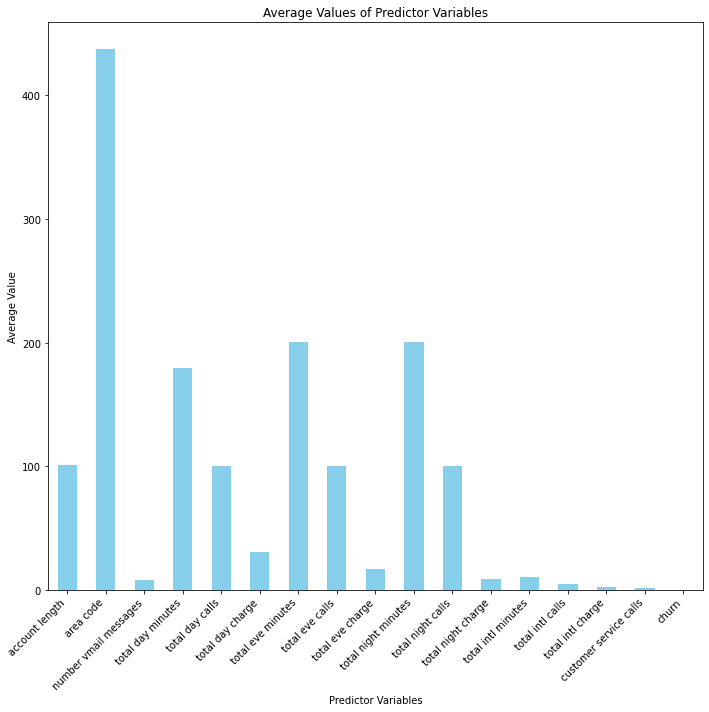

In [82]:
# Calculate the average of each predictor variable
averages = data.mean()

# Plot the averages
plt.figure(figsize=(10, 10))
averages.plot(kind='bar', color='skyblue')
plt.title('Average Values of Predictor Variables')
plt.xlabel('Predictor Variables')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Visualize number of clients who churned the Syriatel call/message services**

In [83]:

# Count the number of clients who churned and who did not churn
churn_counts = data['churn'].value_counts()
churn_counts



False    2850
True      483
Name: churn, dtype: int64

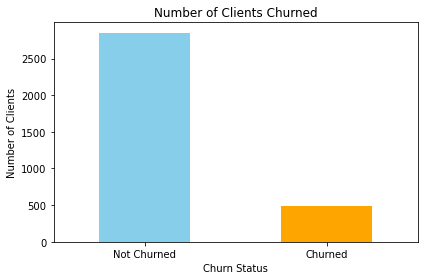

In [84]:
# Plot the counts
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Clients Churned')
plt.xlabel('Churn Status')
plt.ylabel('Number of Clients')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'], rotation=0)
plt.tight_layout()
plt.show()

**A total of 483/3333 clients churned the services due to various factors**

In [85]:
# Filter churned clients
churned_clients = df[df['churn'] == True]

# Print the first few rows of churned clients to verify
print(churned_clients)


     state  account length  area code phone number international plan  \
10      IN              65        415     329-6603                 no   
15      NY             161        415     351-7269                 no   
21      CO              77        408     393-7984                 no   
33      AZ              12        408     360-1596                 no   
41      MD             135        408     383-6029                yes   
...    ...             ...        ...          ...                ...   
3301    CA              84        415     417-1488                 no   
3304    IL              71        510     330-7137                yes   
3320    GA             122        510     411-5677                yes   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   

     voice mail plan  number vmail messages  total day minutes  \
10                no                      0              

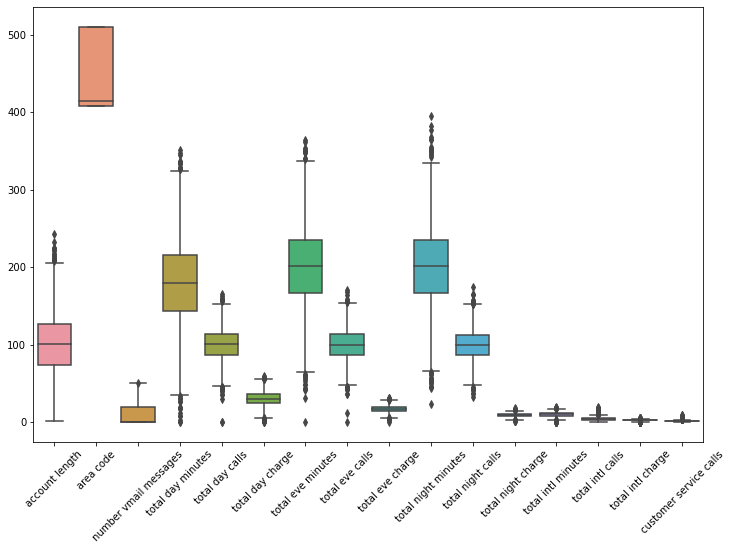

In [86]:
#Check for outliers


# Box plot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.show()

In [87]:
# Calculate Z-score for each numerical column
z_scores = scipy.stats.zscore(df.select_dtypes(include=['int64', 'float64']))

# Identify outliers using a threshold (e.g., Z-score greater than 3 or less than -3)
outliers = (z_scores > 3) | (z_scores < -3)


NameError: name 'scipy' is not defined

In [88]:
# Print the indices of rows containing outliers
outlier_indices = df.index[outliers.any(axis=1)]
print("Indices of rows containing outliers:")
print(outlier_indices)
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Print the indices of rows containing outliers
outlier_indices = df.index[outliers.any(axis=1)]
print("Indices of rows containing outliers:")
print(outlier_indices)


ValueError: No axis named 1 for object type Series

In [89]:
import pandas as pd

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('Data.csv')

# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any()

# Print the indices of columns containing outliers
print(outliers[outliers].index)


Index(['account length', 'churn', 'customer service calls',
       'number vmail messages', 'total day calls', 'total day charge',
       'total day minutes', 'total eve calls', 'total eve charge',
       'total eve minutes', 'total intl calls', 'total intl charge',
       'total intl minutes', 'total night calls', 'total night charge',
       'total night minutes'],
      dtype='object')


In [90]:
outliers.sum()

16